In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(rc={'figure.figsize':(15, 5)})

___

## Tarefa 1

***Carregue a base de dados adult.data e adult.test.***

O arquivo _"adult.data"_ não contém um _"header"_. Portanto, vamos criar o nome das colunas manualmente a partir do arquivo _"old.adult.names"_.

In [2]:
names = [
    'age', 
    'workclass', 
    'fnlwgt', 
    'education', 
    'education_num', 
    'marital_status', 
    'occupation', 
    'relationship', 
    'race', 
    'sex', 
    'capital_gain', 
    'capital_loss', 
    'hours_per_week', 
    'native_country',
    'class'
]

len(names)

15

In [3]:
df = pd.read_csv('./Data/adult.data', names=names)

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


___

## Tarefa 2 

***Faça uma análise inicial dos dados: quais problemas você encontrou? Como você trataria
tais problemas?***

### Geral

Vamos dar uma olhada geral nas informações dos dados.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Dados Faltantes

Aparentemente, não há dados faltantes. Mas vamos olhar para as categorias de uma _feature_ categórica.

In [6]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Há uma classe entitulada "?". Portanto, o _dataset_ deve ter sido previamente tratado de modo a substituir valores nulos ou desconhecidos pelo ponto de interrogação.

In [7]:
df.eq(' ?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
class                0
dtype: int64

Vemos que apenas 3 _features_ apresentam "?" como um dos seus valores. 

Uma delas é o país de origem. 

Mas são as outras duas que apresentam o valor em uma quantidade maior. E ambas estão relacionadas à ocupação da pessoa. Portanto faz sentido que a quantidade de dados desconhecidos em ambas seja parecido.

In [8]:
df[df.occupation == ' ?']['workclass'].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

Com o código acima, vemos que todos os registros em que não há informação sobre a ocupação da pessoa são resultado ou da falta de informação em relação à _workclass_ ou porque a pessoa nunca trabalhou - não sendo possível determinar a ocupação nesse caso.

In [9]:
df.eq(' ?').sum()/len(df.index)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
class             0.000000
dtype: float64

De qualquer forma, vemos que no pior caso os dados faltantes representam pouco mais de 5% dos dados.

Nesse caso específico em que a base de dados possui mais de 32 mil registros uma abordagem em relação a esses registros poderia ser desconsiderá-los se se considerar que 30 mil registros ainda seriam um bom número para se trabalhar.

Uma outra abordagem poderia ser deixar esses registros com a interrogação marcando a falta de informação. Ou seja, poderia se trabalhar essa falta de informação com uma informação em si a ser considerada. Nesse último caso, talvez isso possa servir aos modelos a serem testados como algo relevante.

### Dados duplicados

In [10]:
df.duplicated().sum()

24

Vemos que há 24 registros duplicados. 

Aqui não temos como saber do que se trata. 

Pode ser uma duplicação de fato, ou seja, um registro repetido.

Mas como não há um _id_ na base de dados, pode ser que diferentes pessoas possuam exatamente as mesmas características, principalmente se levarmos em consideração que se trata de uma base que engloba dados nacionais de um país populoso como os EUA e que o número de "duplicados" é apenas 24 (~ 0,74% da base).

In [11]:
df.duplicated().sum()/len(df.index)*100

0.07370780995669667

### _Features_ Numéricas

In [12]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Algumas considerações:

- As _features_ relacionadas ao capital apresentam valores muito discrepantes: o que pode ser constatado pelo desvião padrão muito alto e pelo fato de que todos os valores até o 3º quartil são todos iguais a zero.

- Com relação a "*hours_per_week*" parece haver _outliers_, nesse caso representado pelo valor máximo, uma vez que ter uma contagem de 99 horas trabalhadas por semana representa trabalhar mais do que 14 horas por dia, todos os 7 dias.

___

## Tarefa 3 

***Faça uma análise exploratória dos dados: quais informações interessantes você encontrou
(exemplos: distribuições de variáveis, outliers, correlações, etc.)***

### _Target_

Vamos começar com a variável alvo.

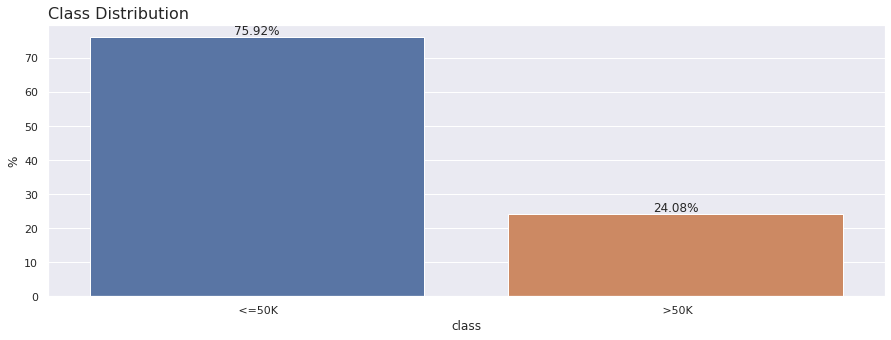

In [13]:
target_dist = df['class'].value_counts(normalize=True)

x = target_dist.index
y = target_dist.values*100

ax = sns.barplot(x=x, y=y)

# Add labels to bars
bars_labels = [f'{v:.2f}%' for v in y]
ax.bar_label(container=ax.containers[0], labels=bars_labels)

plt.xlabel('class')
plt.ylabel('%')
plt.title('Class Distribution', loc='left', fontsize=16)
plt.show()

Portanto, temos um _target_ desbalanceado, com cerca de 76% dos casos sendo da classe de renda menor e os cerca de 24% reestante sendo da classe de renda maior.

### _Features_ Categóricas

In [14]:
df.select_dtypes(include=object).drop(columns='class').columns.tolist()

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

A função a seguir "plota" a distribuição do _target_ dentro de cada categoria das _features_ categóricas.

In [15]:
def plot_class_dist_by_category(feature):
    class_count_by_cat = df.groupby(by=[feature, 'class']).size()
    
    count_by_cat = df.groupby(by=feature).size()
    
    class_dist_by_cat = (class_count_by_cat/count_by_cat*100).reset_index(name='%')
    
    ax = sns.barplot(data=class_dist_by_cat, y=feature, x='%', hue='class', orient='h')
    
    plt.xticks(range(0,101, 5))    
    ax.set_title(f'Class distribution within {feature.title()}', loc='left', fontsize=16)
    
    plt.show()

Já a função abaixo mostra a quantidade de valores dentro de cada categoria, para podermos avaliar a quantidade base em que a proporção de cada classe será montada.

In [16]:
def show_value_counts(feature):
    display(df[feature].value_counts())

#### _Workclass_

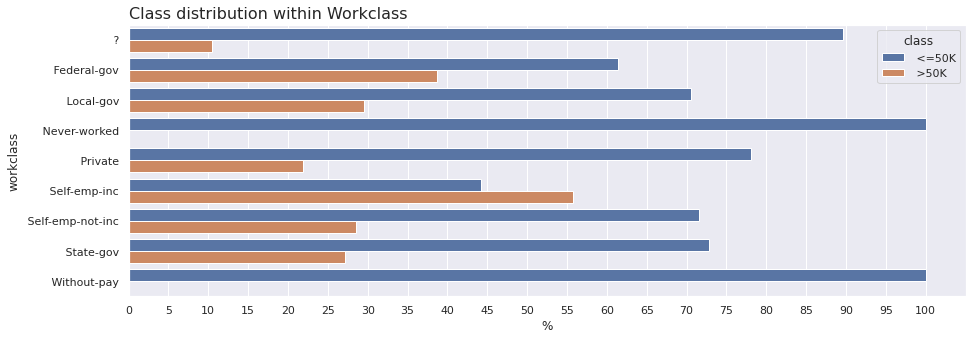

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
plot_class_dist_by_category('workclass')

show_value_counts('workclass')

- Destaque aqui para a categoria _self-emp-inc_, que apresenta uma inversão em relação à distribuição geral: mais da metade possui renda "alta".

- A categoria _federal-gov_ apresenta uma leve diferença com a distribuição geral de _class_: há uma proporção um pouco maior de pessoas com rendas mmaiores do que 50K.

- Nas categorias _never-worked_ e _without-pay_, 100% dos registros pertencem à classe de ganhos menores do que 50K, embora contem poucos registros cada uma.

- As demais categorias seguem mais ou menos a distribuição geral.

#### _Education_

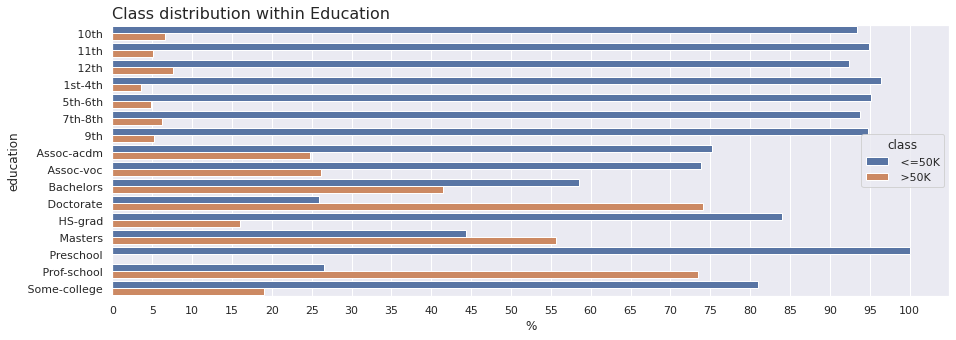

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [18]:
plot_class_dist_by_category('education')

show_value_counts('education')

Nesse caso trata-se de uma variável categórica ordinal e, portanto, vamos reordenar manualmente as categorias.

In [19]:
df.education.value_counts().index.tolist()

[' HS-grad',
 ' Some-college',
 ' Bachelors',
 ' Masters',
 ' Assoc-voc',
 ' 11th',
 ' Assoc-acdm',
 ' 10th',
 ' 7th-8th',
 ' Prof-school',
 ' 9th',
 ' 12th',
 ' Doctorate',
 ' 5th-6th',
 ' 1st-4th',
 ' Preschool']

In [20]:
ordered_educ = [
    ' Preschool',
    ' 1st-4th',
    ' 5th-6th',
    ' 7th-8th',
    ' 9th',
    ' 10th',
    ' 11th',
    ' 12th',
    ' HS-grad',
    ' Assoc-voc',
    ' Assoc-acdm',
    ' Some-college',
    ' Bachelors',
    ' Prof-school',
    ' Masters',
    ' Doctorate'
 ]

Agora que temos as categorias educacionais ordenadas do modo correto, vamos plotar o mesmo gráfico acima mas com a nova ordenação.

Para tanto vamos adaptar o código da função que plota o gráfico.

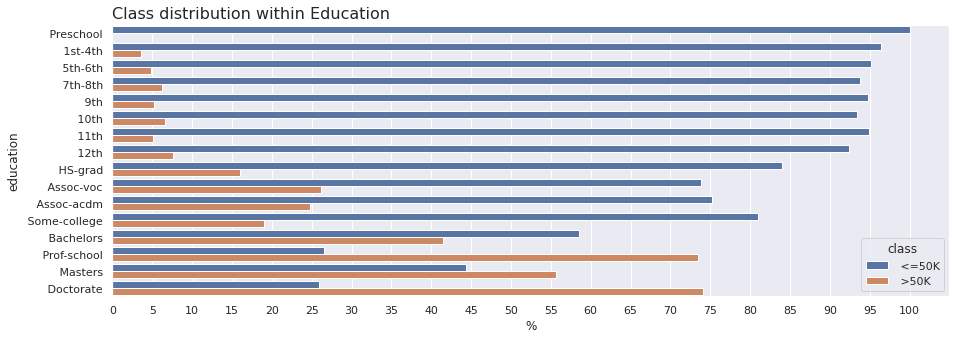

 Preschool          51
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 10th              933
 11th             1175
 12th              433
 HS-grad         10501
 Assoc-voc        1382
 Assoc-acdm       1067
 Some-college     7291
 Bachelors        5355
 Prof-school       576
 Masters          1723
 Doctorate         413
Name: education, dtype: int64

In [21]:
feature = 'education'

class_count_by_cat = df.groupby(by=[feature, 'class']).size()
    
count_by_cat = df.groupby(by=feature).size()

class_dist_by_cat = (class_count_by_cat/count_by_cat*100).loc[ordered_educ,:,:].reset_index(name='%')

# class_dist_by_cat.reindex(index=ordered_educ, level=0)
# class_dist_by_cat.loc[ordered_educ,:,:]

ax = sns.barplot(data=class_dist_by_cat, y=feature, x='%', hue='class', orient='h')

plt.xticks(range(0,101, 5))    
ax.set_title(f'Class distribution within {feature.title()}', loc='left', fontsize=16)

plt.show()

display(df.education.value_counts().loc[ordered_educ])

- Uma primeira observação que podemos fazer é que quanto maior a escolaridade maior a renda.

- Nenhuma pessoa apenas com _preschool_ apresenta renda maior do 50K.

- Menos de 10% das pessoas com escolaridade abaixo de _high-school_ ganham mais do que 50K.

- A distribuição geral da renda se inverte para pessoas com escolaridade acima de _bachelors_.

#### _Marital Status_

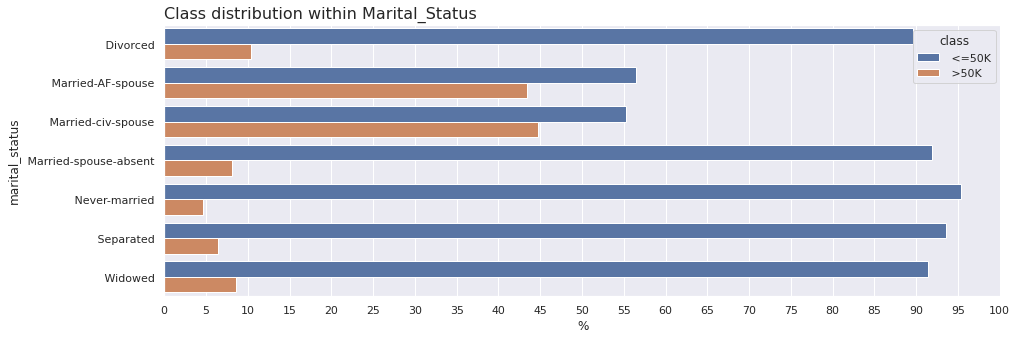

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [22]:
plot_class_dist_by_category('marital_status')

show_value_counts('marital_status')

- Aqui vemos uma clara separação entre viver ou não com o(a) companheiro(a).

- A porcentagem de pessoas sem o par e com renda acima de 50K fica abaixo de 10% (exceto os divorciados que ficam um pouco acima.)

- Já para pessoas casadas, civil ou militarmente, e morando com o par, tal porcentagem fica entre 40% e 45%.

#### _Occupation_

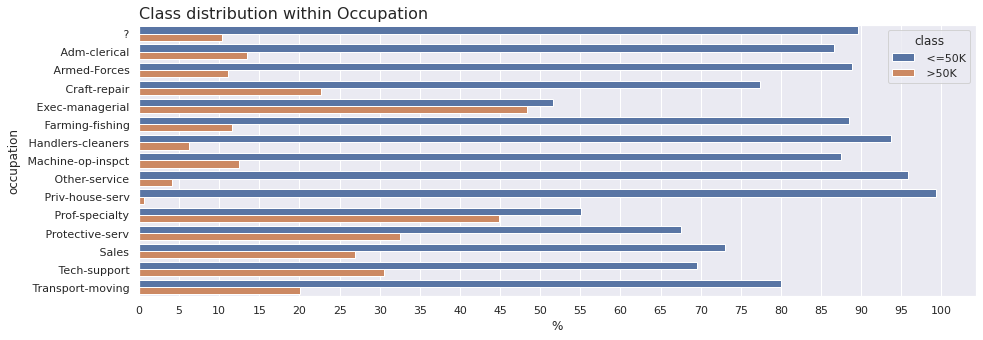

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
plot_class_dist_by_category('occupation')

show_value_counts('occupation')

- Há variações da distribuição do _target_ para ambos lados.

- Em um extemo, destaque para a categoria _exec-managerial_ em que a distribuição é quase 50-50.

- No outro extremo, a categoria _priv-house-serv_ em que quase 100% tem renda menor do que 50K.

- Categoria _Armed-Forces_ com apenas 9 registros.

#### _Relantionship_

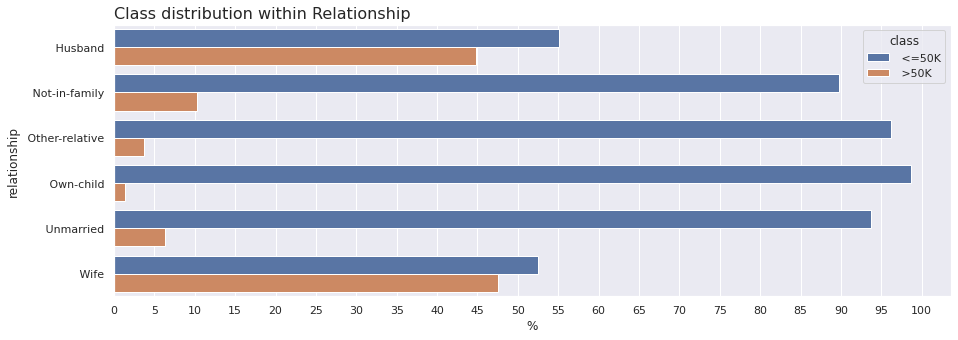

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [24]:
plot_class_dist_by_category('relationship')

show_value_counts('relationship')

- Como visto em _maritage-status_, a distribuião de _class_ é mais equilibrada para pessoas com conjuge e mais desequilibrada em favor da renda menor nos demais casos.

#### _Race_

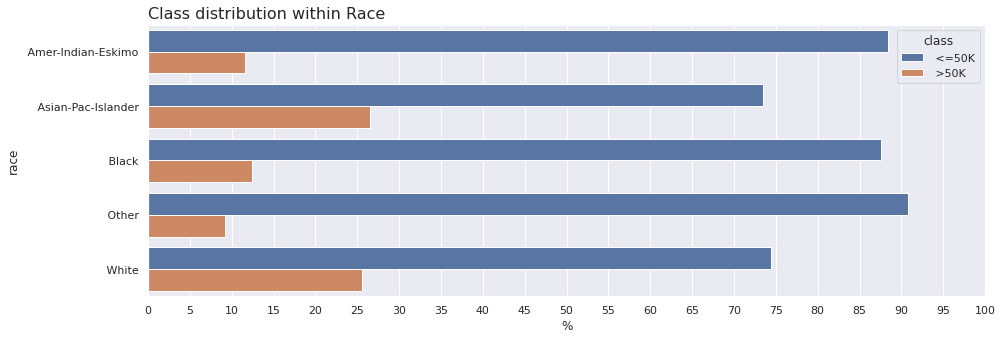

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [25]:
plot_class_dist_by_category('race')

show_value_counts('race')

- Entre pessoas brancas e habitantes da Ásia-Pacífico, a distribuição é parecida com a geral.

- Já entre as demais raças observadas, a prevalência de renda menor fica por volta de 90%.

#### _Sex_

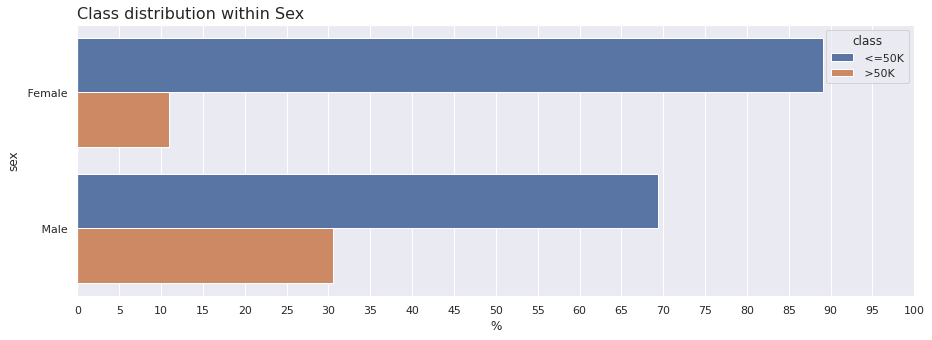

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [26]:
plot_class_dist_by_category('sex')

show_value_counts('sex')

- Aqui há diferença considerável, com a distribuição entre homens ligeiramente distinta da geral, mas com uma discrepância maior entre as mulheres - pouco mais de 10% com rendas acima de 50K.

#### _Native Country_

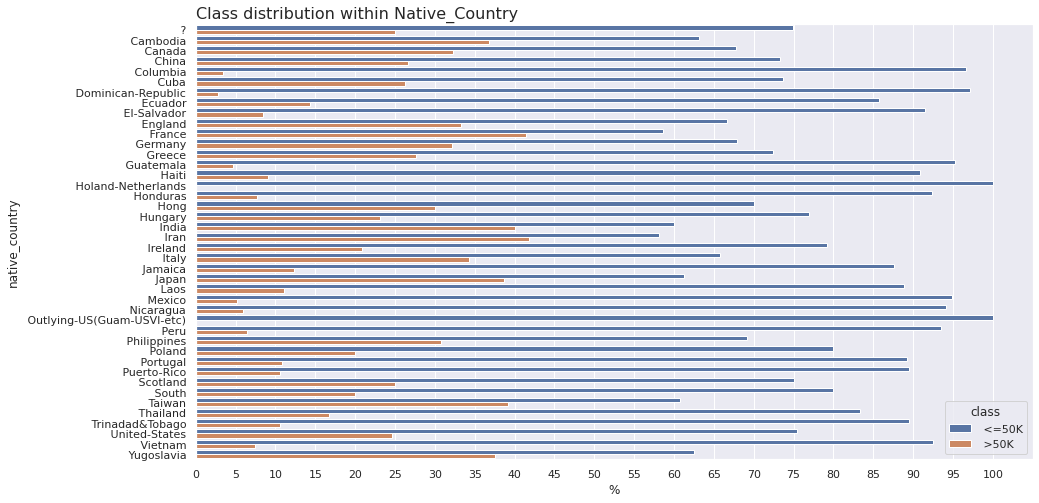

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [27]:
# aumentando a altura do gráfico para melhor visualização
sns.set(rc={'figure.figsize':(15, 8)})
plot_class_dist_by_category('native_country')

show_value_counts('native_country')

- Aqui temos muitas categorias dificultando um pouco a visualização.

- Também notamos uma boa quantidade de países com poucas observações registradas.

- Talvez seja interessante, fazer uma análise por continente ou subcontinentes.

### _Features_ Numéricas

#### Correlação
Vamos começar avaliando a correlação na base de dados.

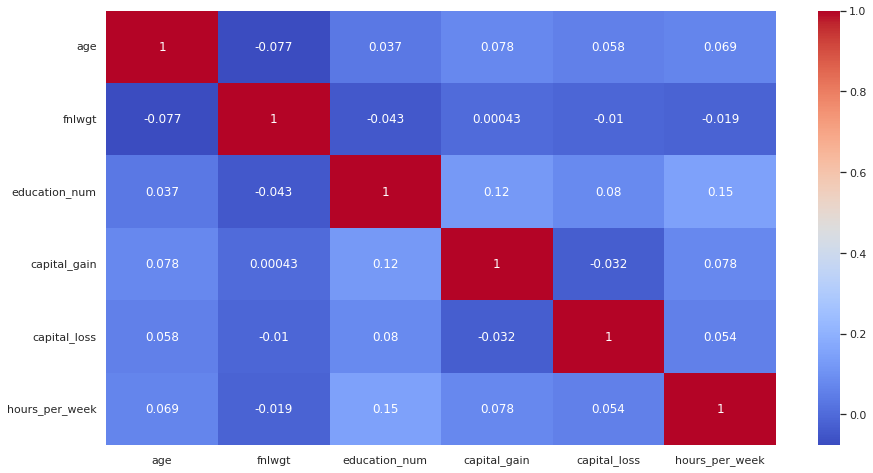

In [28]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

Há pouquissíma correlação entre as variavéis.

In [29]:
df.select_dtypes(include=np.number).columns.to_list()

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

#### _Education Num_
Embora esteja como tipo numérico, podemos olhar para _education-num_ como categórica, por se tratar de um caso discreto e com poucos valores únicos.

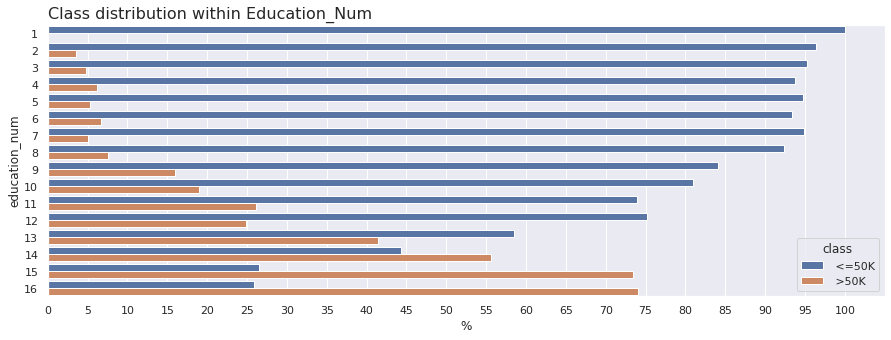

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [30]:
# voltando ao padrão do documento
sns.set(rc={'figure.figsize':(15, 5)})

plot_class_dist_by_category('education_num')

show_value_counts('education_num')

Aqui fica bem claro a relação direta entre tempo de educação formal e a propabilidade de renda maior, já observada ao analisar a variável _education_.

In [31]:
def plot_dists(feature):
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6), constrained_layout=True)
    fig.suptitle(f'{feature.title()} Distributions', fontsize=16)

    axs[0].set_title('General', fontsize=14)
    sns.histplot(data=df, x=feature, discrete=True, stat='percent', 
                 palette='colorblind', ax=axs[0])

    axs[1].set_title('By class', fontsize=14)
    sns.histplot(data=df, x=feature, discrete=True, hue='class', 
                      stat='percent', palette='colorblind', ax=axs[1])

    axs[1].sharey(axs[0])

    plt.show()

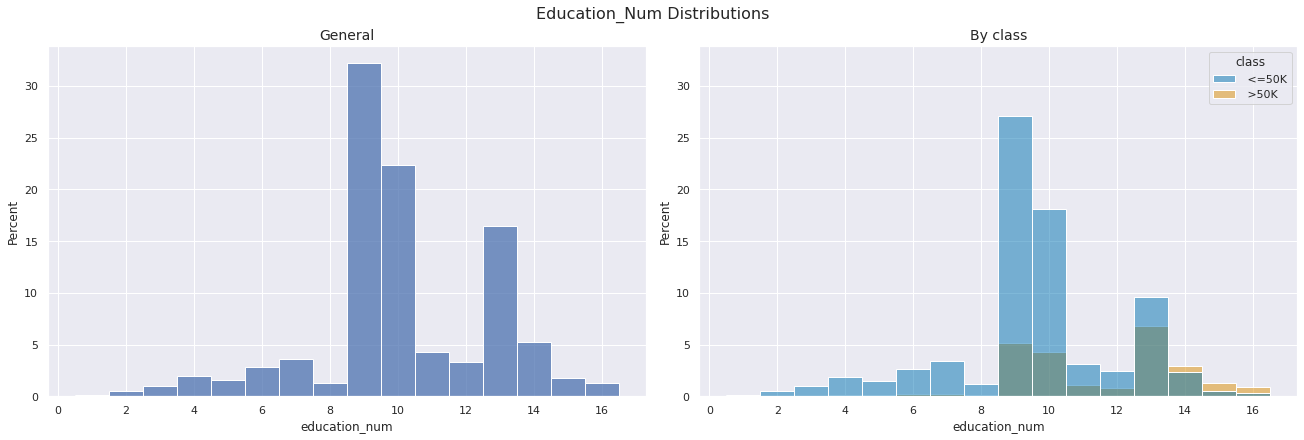

In [32]:
plot_dists('education_num')

#### _Age_

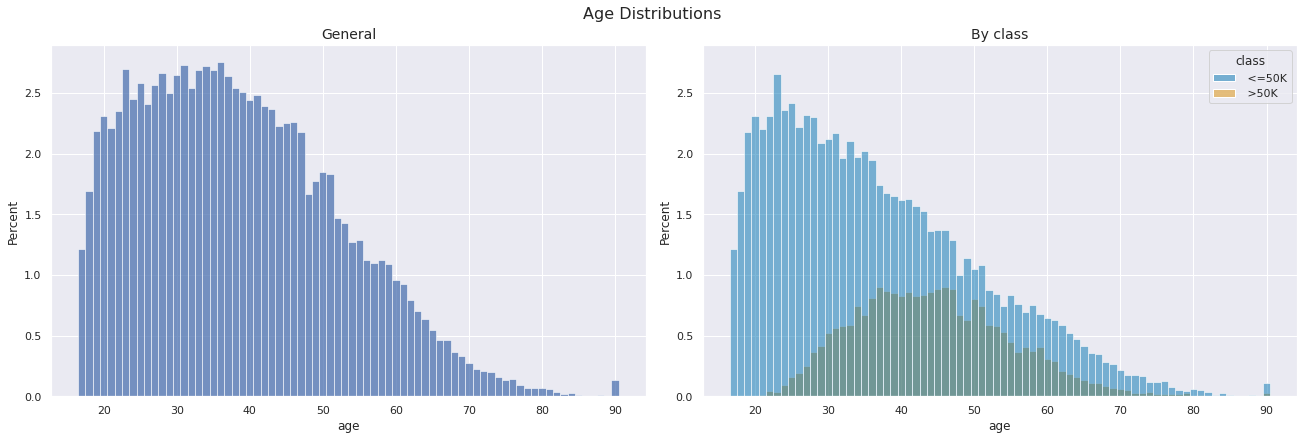

In [33]:
plot_dists('age')

#### _Fnlwgt_

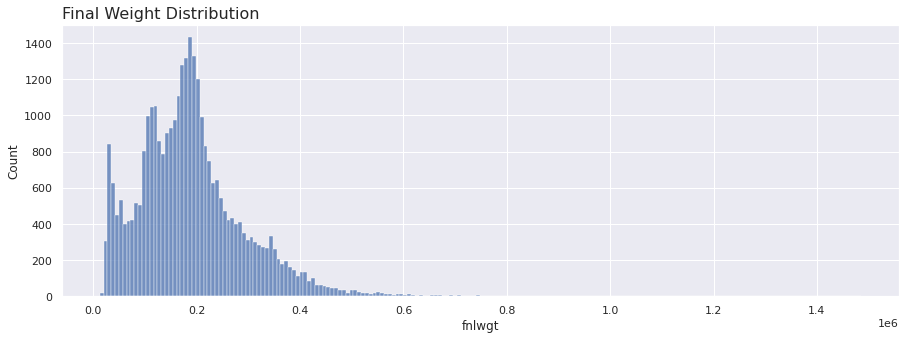

In [34]:
sns.histplot(data=df, x='fnlwgt')
plt.title('Final Weight Distribution', loc='left', fontsize=16)
plt.show()

#### _Capital Gain_

In [35]:
df.capital_gain.describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

Boa parte dos registros não apresentaram ganhos de capital.

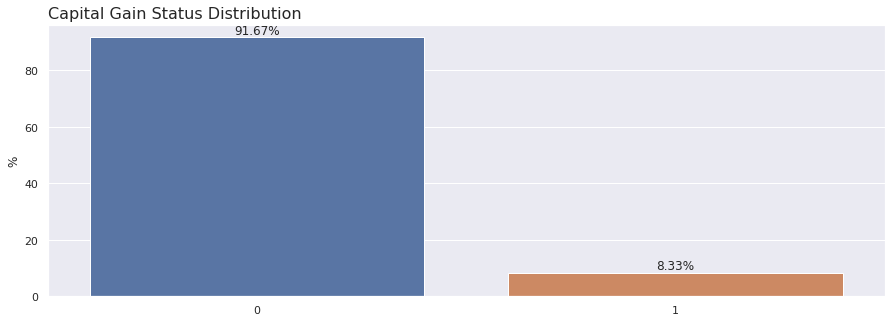

In [36]:
df['gain_status'] = df.capital_gain.apply(lambda x: 1 if x else 0)

gain_status_dist = df.gain_status.value_counts(normalize=True)

x = gain_status_dist.index
y = gain_status_dist.values*100

ax = sns.barplot(x=x, y=y)

bars_labels = [f'{v:.2f}%' for v in y]
ax.bar_label(container=ax.containers[0], labels=bars_labels)

plt.title('Capital Gain Status Distribution', loc='left', fontsize=16)
plt.ylabel('%')
plt.show()

De fato, cerca de 95% dos registros não apresentaram ganhos.

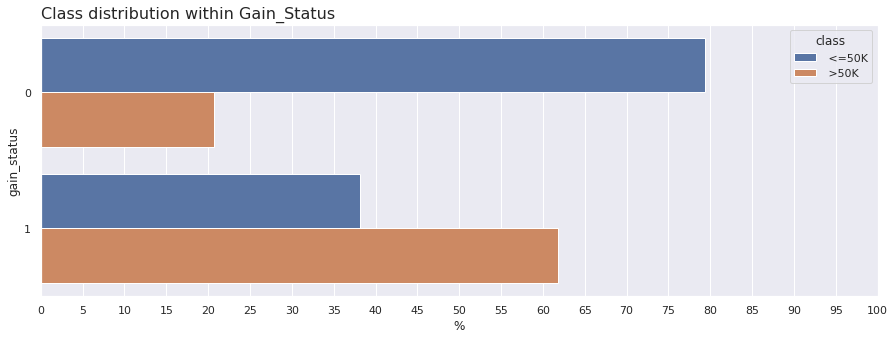

In [37]:
plot_class_dist_by_category('gain_status')

Entre as pessoas que não apresentaram ganhos a distribuição da classe de renda difere levemente da distribuição geral.

Mas entre as pessoas que apresentaram ganhos, há uma inversão com mais do que 60% sendo da classe de renda maior do que 50K.

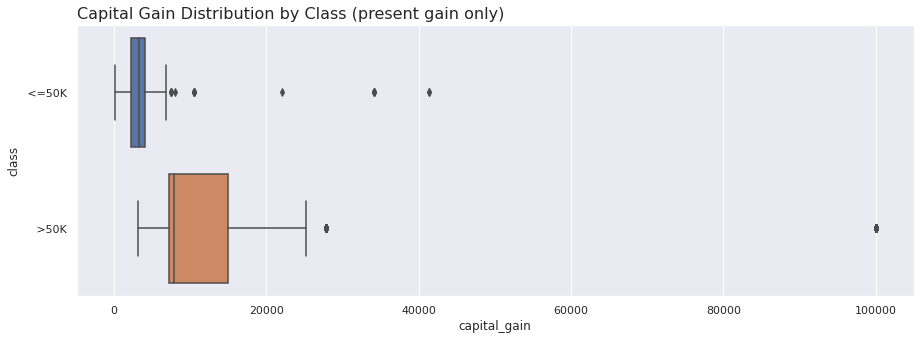

In [38]:
plt.title('Capital Gain Distribution by Class (present gain only)', loc='left', fontsize=16)
sns.boxplot(data=df[df.gain_status == 1], x='capital_gain', y='class')
plt.show()

Aqui vemos que, em geral, os valores ganhos na classe de renda menor foram mais concentrados e menores do que os valores ganhos na classe de renda maior.

OBS: Vemos um claro _outlier_ aqui: um registro de ganho no valor de 10000, valor bastante discrepante dos demais.

Agora vamos olhar para o ganho de capital separando por raça e classe de renda.

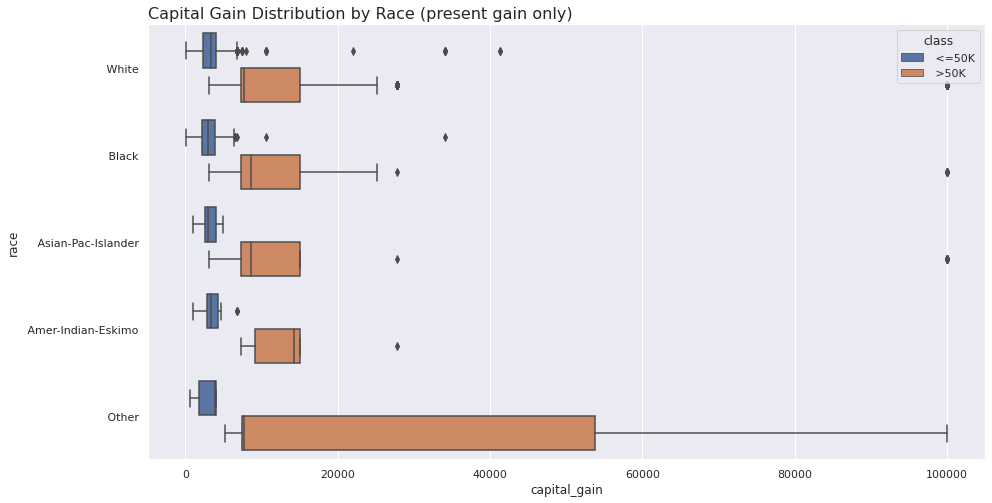

In [39]:
plt.figure(figsize=(15, 8))
plt.title('Capital Gain Distribution by Race (present gain only)', loc='left', fontsize=16)
sns.boxplot(data=df[df.gain_status == 1], x='capital_gain', y='race', hue='class')
plt.show()

A tendência de maiores ganhos na classe de renda maior se observa também dentro das categorias raciais com algumas diferenças entre essas categorias.

#### _Capital Loss_

In [40]:
df.capital_loss.describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

Vemos aqui que boa parte dos dados possuem valor igual a zero.

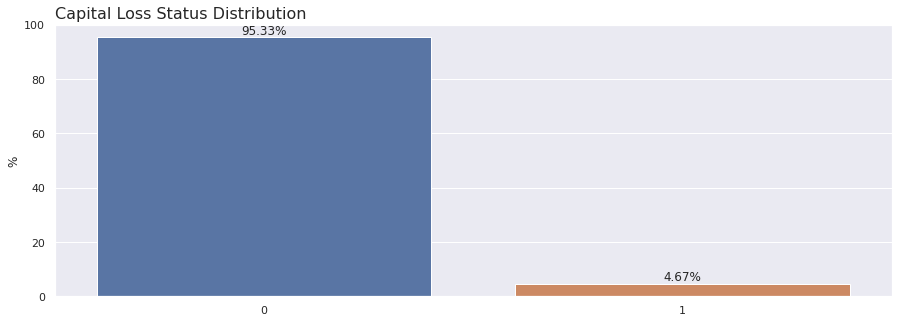

In [41]:
df['loss_status'] = df.capital_loss.apply(lambda x: 1 if x else 0)

loss_status_dist = df.loss_status.value_counts(normalize=True)

x = loss_status_dist.index
y = loss_status_dist.values*100

ax = sns.barplot(x=x, y=y)

bars_labels = [f'{v:.2f}%' for v in y]
ax.bar_label(container=ax.containers[0], labels=bars_labels)

plt.title('Capital Loss Status Distribution', loc='left', fontsize=16)
plt.ylabel('%')
plt.show()

Vemos que cerca de 95% das pessoas não apresentaram perda de capital.

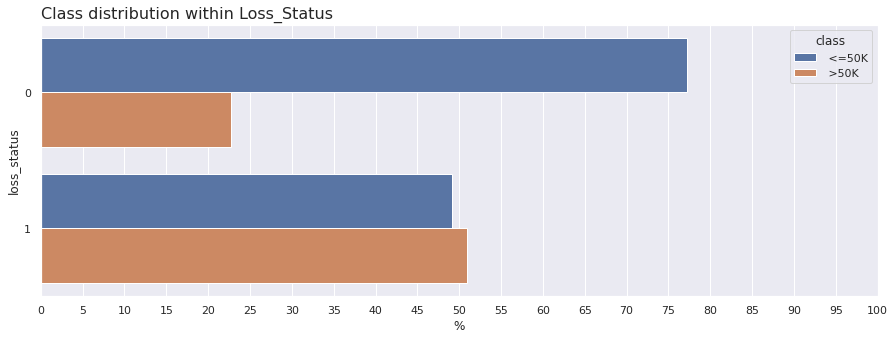

In [42]:
plot_class_dist_by_category('loss_status')

Dentre as pessoas que não registraram perdas, a distribuição geral do _target_.

Já entre as pessoas que apresentaram perdas, temos uma distribuição próxima de 50-50, ou seja, as perdas, em número de registros, são distribuídas igualmente entre as duas faixas de renda.

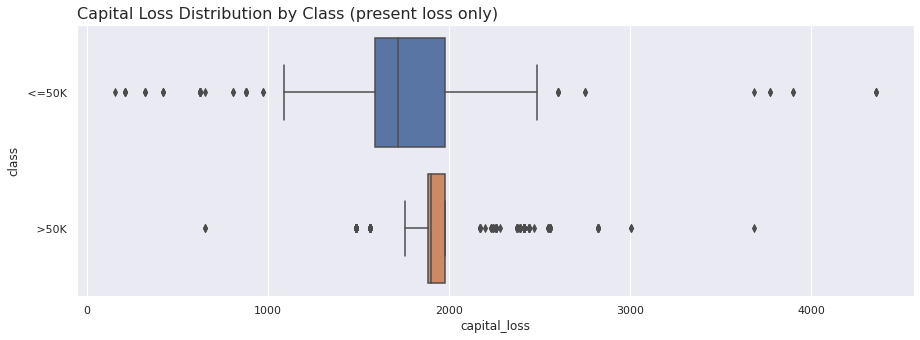

In [43]:
plt.title('Capital Loss Distribution by Class (present loss only)', loc='left', fontsize=16)
sns.boxplot(data=df[df.loss_status == 1], x='capital_loss', y='class')
plt.show()

Por outro lado, o gráfico acima mostra que, para as pessoas que tiveram perda de capital, a mediana de perda foi parecida nas duas categorias de renda, mas a variação nos valores perdidos foi maior para a classe de renda inferior a 50K.

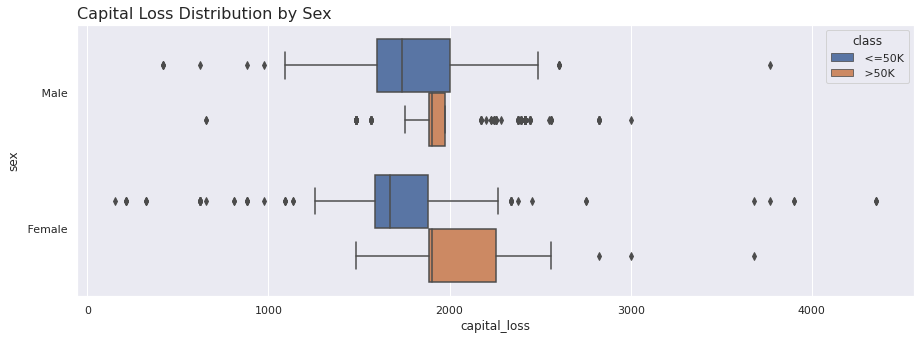

In [44]:
plt.title('Capital Loss Distribution by Sex', loc='left', fontsize=16)
sns.boxplot(data=df[df.loss_status == 1], x='capital_loss', y='sex', hue='class')
plt.show()

Olhando por sexo, vemos que as medianas de perda são próximas dentro de cada classe.

Homens com renda menor apresentaram maior variação nas perdas, mas com menos valores distoantes em relação aos homens com renda maior.

Mulheres com renda menor apresentaram mais valores extremados de perda em relação às mulheres com renda maior. 

Por outro lado, olhando para a faixa de renda menor, mulheres apresentaram uma concentração ligeiramente maior do que os homens, mas com maior quantidade de valores distoantes.

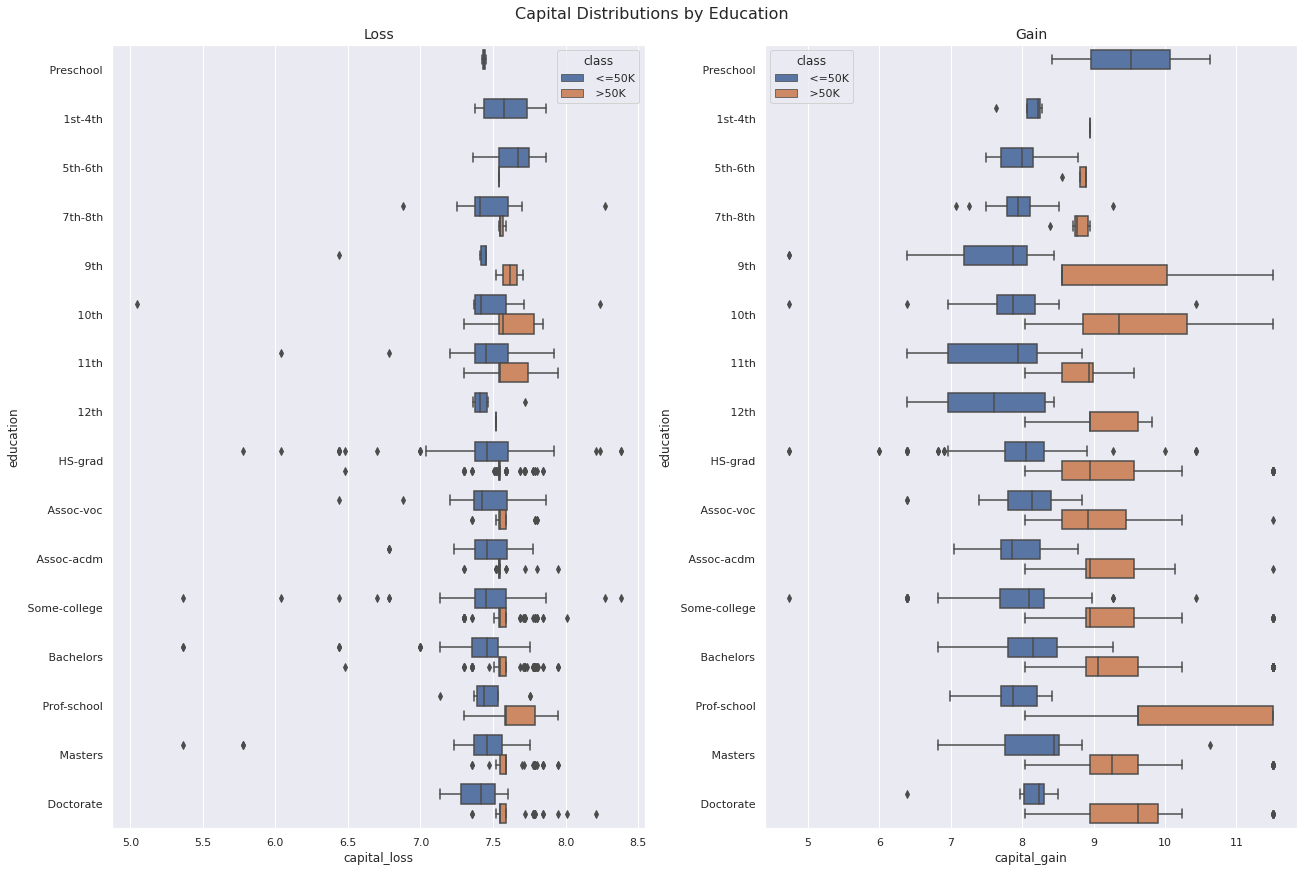

In [45]:
fig, axs = plt.subplots(ncols=2, figsize=(18, 12), constrained_layout=True)
fig.suptitle('Capital Distributions by Education', fontsize=16)

axs[0].set_title('Loss', fontsize=14)
data = df[df.loss_status == 1]
sns.boxplot(data=data, x=np.log(data.capital_loss), y='education', hue='class', 
            order=ordered_educ, ax=axs[0])

axs[1].set_title('Gain', fontsize=14)
data = df[df.gain_status == 1]
sns.boxplot(data=data, x=np.log(data.capital_gain), y='education', hue='class', 
            order=ordered_educ, ax=axs[1])

plt.show()

Olhando para as perdas, vemos que na classe de renda maior as perdas foram ligeiramente maiores dentre das classes.

Já nos ganhos, eles foram consideravelmente maiores na classe de renda maior em todas as classes.

#### _Hours Per Week_

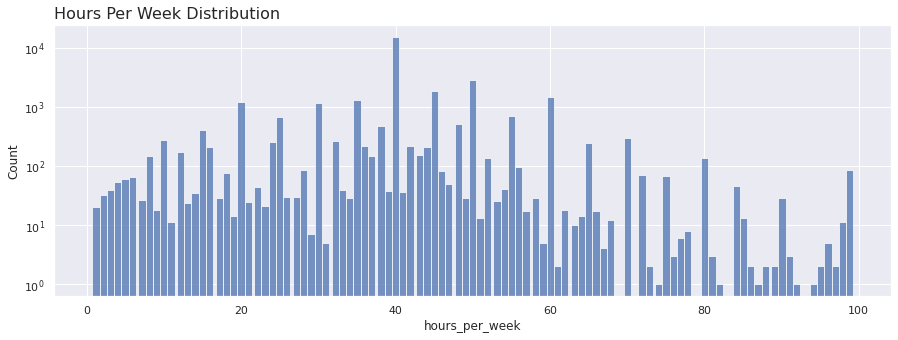

In [46]:
plt.title('Hours Per Week Distribution', loc='left', fontsize=16)
sns.histplot(data=df, x='hours_per_week', log_scale=(False, True), shrink=3)
plt.show()

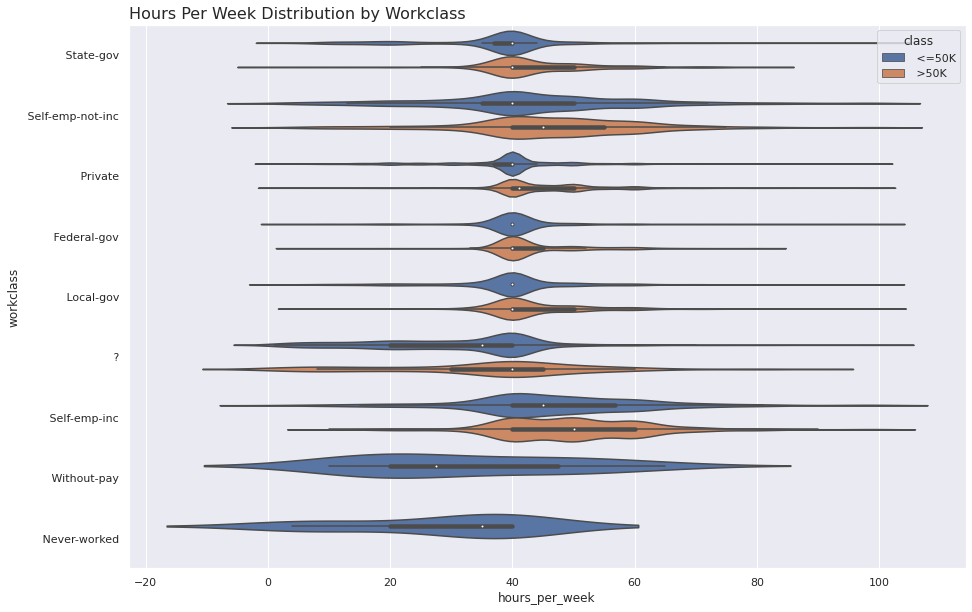

In [47]:
plt.figure(figsize=(15, 10))
plt.title('Hours Per Week Distribution by Workclass', loc='left', fontsize=16)
sns.violinplot(data=df, x='hours_per_week', y='workclass', hue='class')
plt.show()

Aqui podemos observar algo: pessoas "empresárias" tendem a trabalhar mais horas por semana do que as pessoas das demais classes trabalhistas.

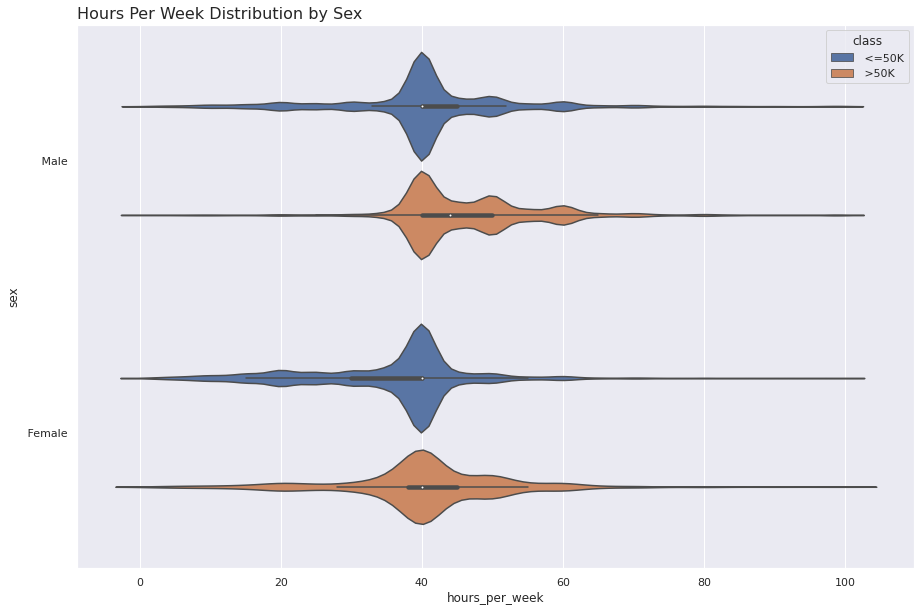

In [48]:
plt.figure(figsize=(15, 10))
plt.title('Hours Per Week Distribution by Sex', loc='left', fontsize=16)
sns.violinplot(data=df, x='hours_per_week', y='sex', hue='class')
plt.show()

Independente da faixa de renda, é possível notar que homens tendem a trabalhar mais horas por semana do que mulheres, provavelmente em razão de os cuidados domésticos recaírem mais sobre as mulheres.

### Considerações

Ressaltamos que essa não pretendeu ser uma análise exploratória exaustiva. 

Seria possível analisar ainda muitas outras combinações de _features_ para tentar descobrir relações.

Escolhemos algumas que fossem abrangentes o suficiente e que dessem uma boa visão geral dos dados.

___

## Tarefa 4

***Note que a base de dados é desbalanceada para a variável resposta “class”. Utilize uma
técnica para balancear os dados, justificando sua escolha.***

Uma abordagem para lidar com o desbalanço entre as classes da variável resposta é fazer uma reamostragem da base de dados.

Para isso podemos aumentar os registros da classe minoritária (_oversampling_) ou diminuir os registros da classe majoritária (_undersampling_).

Em relação ao _oversampling_, temos a vantagem de não "perder" dados. Por outro lado, essa técnica faz um maior uso de memória e processamento, além de poder levar os modelos a se sobreajustar aos dados (_overfitting_).

Já no _undersampling_, temos como vantagem o menor uso de memória e processamento, mas como desvantagem há a "perda" de dados e a escolha dos dados que são descartados pode ser enviesada.

É claro que hoje já existem ferramentas que tentam mitigar as desvantagens destacadas acima.

A base de dados com a qual estamos trabalhando apresenta um desbalanço que pode ser considerado moderado. Além disso, trata-se de uma base de dados grande o suficiente, mas não gigantesca - com centenas de milhares ou até milhões de registros.

**Portanto, se tivesse que decidir apenas entre uma das duas técnicas, eu escolheria, para este caso particular, fazer um _oversampling_ da classe minoritária.**

Por outro lado, sabe-se que uma combinação das duas técnicas funciona melhor, em geral, que alguma delas separadamente.

Isto posto, **não sendo obrigado a escolher apenas uma das duas, eu escolheria uma combinação de ambas.**

A biblioteca python de ML para bases de dados desbalanceadas (_Imblearn_) já provê algoritmos para fazer essa combinação, como por exemplo _SMOTETomek_ e _SMOTEENN_, além de classificadores de _ensemble_ que tratam do desbalanço das classes.

Além disso, alguns dos algoritmos de classificação da biblioteca _scikitleran_, também abordam o problema do desbalanceamento por meio do parâmetro "*class_weight*".

Vamos utilizar o *SMOTEENN* para balancear os dados pois segundo a documentação, ele faz uma limpeza maior na fase de *undersampling*.

Primeiramente, vamos voltar para a base de dados original.

In [49]:
df = df.drop(columns=['gain_status', 'loss_status'])

y = df['class']
X = df.drop(columns=['class'])

In [50]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import OneHotEncoder

smtenn = SMOTEENN(random_state=42)

# Tivemos que fazer o OneHotEnconding antes pois estava 
# apresentando erro no momento de rodar o fit_transform
# do SMOTEENN
ohe = OneHotEncoder(handle_unknown='ignore')

X_enc = ohe.fit_transform(X)

X_res, y_res = smtenn.fit_resample(X_enc, y)

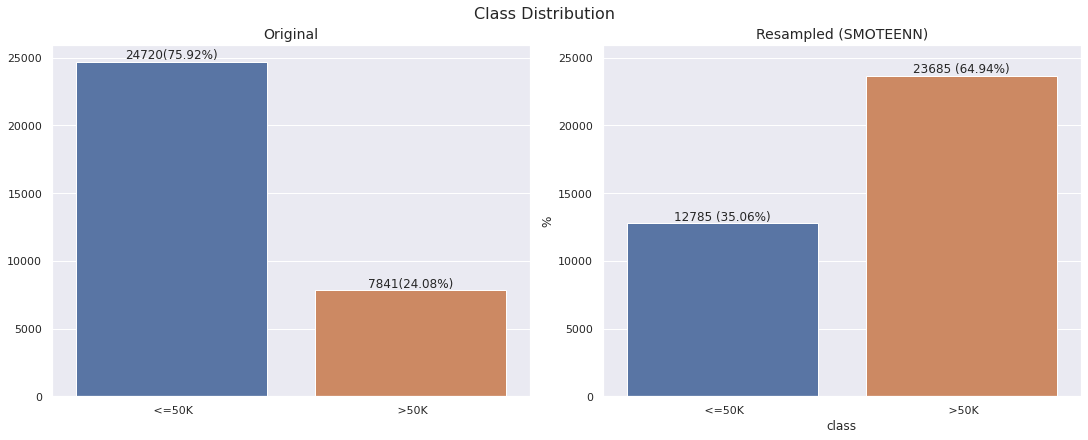

In [51]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6), constrained_layout=True)

fig.suptitle(f'Class Distribution', fontsize=16)

#=================== Original ===============================
orig_dist = y.value_counts()
orig_pcts = y.value_counts(normalize=True)

axs[0].set_title('Original', fontsize=14)
sns.barplot(x=orig_dist.index, y=orig_dist.values, ax=axs[0])

# Add labels to bars
labels = [f'{c}({p:.2f}%)' for c, p in zip(orig_dist.values, orig_pcts.values*100)]
axs[0].bar_label(container=axs[0].containers[0], labels=labels)

#=================== Resampled ===============================
res_dist = y_res.value_counts().sort_index()
res_pcts = y_res.value_counts(normalize=True).sort_index()

axs[1].set_title('Resampled (SMOTEENN)', fontsize=14)
sns.barplot(x=res_dist.index, y=res_dist.values, ax=axs[1])

# Add labels to bars
labels = [f'{c} ({p:.2f}%)' for c, p in zip(res_dist.values, res_pcts.values*100)]
axs[1].bar_label(container=axs[1].containers[0], labels=labels)

#=============================================================
axs[1].sharey(axs[0])
plt.xlabel('class')
plt.ylabel('%')
plt.show()

**Agora temos uma base de dados menos desbalanceada, mas com a distribuição invertida!!!**

Além disso, passamos a ter cerca de 36 mil resgistros, ou seja, pouco maior do que a base original.

Talvez seja necessário ajustar alguns parâmetros dos algoritmos.

Vamos testar novamente, mas com *SMOTETomek*.

In [52]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_res, y_res = smt.fit_resample(X_enc, y)

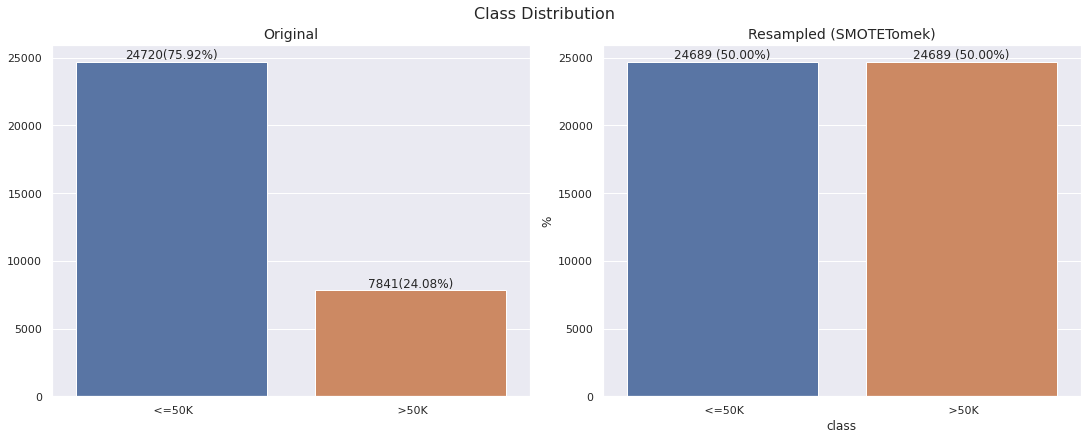

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6), constrained_layout=True)

fig.suptitle(f'Class Distribution', fontsize=16)

#=================== Original ===============================
orig_dist = y.value_counts()
orig_pcts = y.value_counts(normalize=True)

axs[0].set_title('Original', fontsize=14)
sns.barplot(x=orig_dist.index, y=orig_dist.values, ax=axs[0])

# Add labels to bars
labels = [f'{c}({p:.2f}%)' for c, p in zip(orig_dist.values, orig_pcts.values*100)]
axs[0].bar_label(container=axs[0].containers[0], labels=labels)

#=================== Resampled ===============================
res_dist = y_res.value_counts().sort_index()
res_pcts = y_res.value_counts(normalize=True).sort_index()

axs[1].set_title('Resampled (SMOTETomek)', fontsize=14)
sns.barplot(x=res_dist.index, y=res_dist.values, ax=axs[1])

# Add labels to bars
labels = [f'{c} ({p:.2f}%)' for c, p in zip(res_dist.values, res_pcts.values*100)]
axs[1].bar_label(container=axs[1].containers[0], labels=labels)

#=============================================================
axs[1].sharey(axs[0])
plt.xlabel('class')
plt.ylabel('%')
plt.show()

Agora temos uma base totalmente balanceada.

Obsservamos que a quantidade de registros subiu de cerca de 32 mil no original para quase 50 mil.

Comparando os dois vemos que de fato o *SMOTEENN* promove uma limpeza maior na fase de *undersampling*, resultando em um aumento pequeno no número de registros da base. Mas ele não tratou bem a questão do desbalanceamento e ainda inverteu o desbalanço.

Por outro lado, o *SMOTETomek* proporcionou um balanceamento bem melhor, embora tenha resultado em uma base mais de 50% maior em relação à base original.

## Extra

***Apenas como curiosidade vamos testar um pouco da discussão acima com alguns casos específicos.***

Vamos testar uma árvore de decisão nos seguintes casos:

- com os dados originais (sem reamostragem)
- com os dados originais, mas usando o parâmetro *class_weight*
- com _undersampling_ aleatório
- com _undersampling_ utilizando *NearMiss*
- com _oversampling_ aleatório
- com _oversampling_ utilizando SMOTE
- combinação de *over* e *undersampling* utilizando SMOTETomek
- combinação de *over* e *undersampling* utilizando SMOTEENN

Vamos avaliar cada modelo a partir de três métricas:

- roc_auc_score
- balanced_accuracy_score
- geometric_mean_score

*Obs*: segundo a documentação do _Imblearn_, as duas últimas são comuns na literatura que versa sobre desbalanceamento.

O roteiro é "fitar" os modelos, calcular as métricas e guardá-las em um dicionário para posterior visualização e comparação.

Imports

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

Vamos estabelecer uma seed para reprodutibilidade.

In [55]:
RANDOM_STATE = 42

Separando os dados.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, 
                                                    random_state=RANDOM_STATE)

In [57]:
# Dado um modelo e os dados a função calcula os scores das métricas 
# escolhidas e guarda os resultados no dicionário <results>.
def write_scores(model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    results['roc_auc'].append(roc_auc_score(y_test, y_proba))
    results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    results['geometric_mean'].append(geometric_mean_score(y_test, y_pred))
    
    return results

Agora vamos instanciar todas as classes necessárias.

In [58]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)

nm = NearMiss()

ros = RandomOverSampler(random_state=RANDOM_STATE)

smt = SMOTE(random_state=RANDOM_STATE)

smt_tmk = SMOTETomek(random_state=RANDOM_STATE)

smt_enn = SMOTEENN(random_state=RANDOM_STATE)

dtc = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)

wdtc = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE, class_weight='balanced')

ohe = OneHotEncoder(handle_unknown='ignore')

Vamos criar um dicionário cujas chaves serão os nomes escolhidos para os modelos e os valores serão as *pipelines* de cada um dos modelos a serem treinados.

In [59]:
models = {
    'original': Pipeline(steps=[('e', ohe), ('m', dtc)]),
    'intern_balance': Pipeline(steps=[('e', ohe), ('m', wdtc)]),
    'under_rus': Pipeline(steps=[('e', ohe), ('r', rus), ('m', dtc)]),
    'under_nm': Pipeline(steps=[('e', ohe), ('r', nm), ('m', dtc)]),
    'over_ros': Pipeline(steps=[('e', ohe), ('r', ros), ('m', dtc)]),
    'over_smote': Pipeline(steps=[('e', ohe), ('r', smt), ('m', dtc)]),
    'comb_smote_tomek': Pipeline(steps=[('e', ohe), ('r', smt_tmk), ('m', dtc)]),
    'comb_smote_enn': Pipeline(steps=[('e', ohe), ('r', smt_enn), ('m', dtc)])
}

A seguir criamos o dicionário que armazenará os resultados e rodamos cada um dos modelos.

In [60]:
results = {
    'roc_auc': [],
    'balanced_accuracy': [],
    'geometric_mean': []
}

from time import time

for name, model in models.items():
    start_time = time()
    results = write_scores(model, X_train, X_test, y_train, y_test, results)
    delta_time = time() - start_time
    print(name, f'({delta_time:.2f} s)')

original (0.18 s)
intern_balance (0.20 s)
under_rus (0.27 s)
under_nm (4.91 s)
over_ros (0.26 s)
over_smote (2.01 s)
comb_smote_tomek (58.06 s)
comb_smote_enn (65.48 s)


Visualizando os resultados.

In [61]:
df_results = pd.DataFrame(results, index=models.keys())
df_results

,roc_auc,balanced_accuracy,geometric_mean
original,0.852296,0.745744,0.726735
intern_balance,0.854091,0.777750,0.765965
under_rus,0.856289,0.780363,0.770555
under_nm,0.746107,0.692867,0.692864
over_ros,0.855133,0.776295,0.765232
over_smote,0.849990,0.767974,0.760834
comb_smote_tomek,0.849990,0.767974,0.760834
comb_smote_enn,0.805441,0.768571,0.752271


In [62]:
df_results['roc_auc_rank'] = df_results['roc_auc'].rank(ascending=False)
df_results['balanced_accuracy_rank'] = df_results['balanced_accuracy'].rank(ascending=False)
df_results['geometric_mean_rank'] = df_results['geometric_mean'].rank(ascending=False)

df_results['avg_rank'] = df_results.iloc[:,-3:].mean(axis=1)

In [63]:
df_results.avg_rank.sort_values()

under_rus           1.000000
intern_balance      2.333333
over_ros            2.666667
over_smote          5.166667
comb_smote_tomek    5.166667
comb_smote_enn      5.666667
original            6.000000
under_nm            8.000000
Name: avg_rank, dtype: float64

Contrariando o que eu imaginava, a técnica de *undersampling* aleatória isolada foi a que obteve o melhor resultado em cada uma das métricas.

Além disso, o *over_sampling* aletório isolado ficou entre os 3 primeiros.

Finalmente, a segunda colocação ficou com a árvore configurada com o parâmetro *class_weight*.

### Conclusão

Embora a técnica de *undersampling*, aleatório e isolado, tenha tido o melhor desemplenho, precisamos lembrar que apenas alguns modelos foram testatos.

Poderíamos, por exemplo, fazer testes com outros classificadores e/ou métodos de ensemble e boosting. Além de testarmos outras combinações de algoritmos.

Mas o intuito foi o de apenas "brincar" um pouco com a reamostragem, não pretendendo ser uma conclusão definitiva de que abordagem seria melhor para esta base de dados e lembrando que para outras bases é provável que os resultados sejam distintos.

Encerramos observando que o melhor, em qualquer caso, é mesmo testar diversas abordagens, sem preconceitos, sem vieses, com senso crítico e com ceticismo, ou seja, estar aberto ao que os dados podem revelar.

## Obrigado! :)

___